## Geometric Series

Our function is as follows:

<h1><center>
$af(r)=\sum_{i=0}^{\infty}ar^i$
    </center></h1>

where $a \in \mathbb{R}$ and $\lvert r \rvert < 1$

The goal with the below program is to increase $i \in \mathbb{N}$ by one until the if conditional 

```python
if abs(sum(results[power-m:power-1])) < epsilon:
```
                                                 
evaluates True. This is an attempt to simulate the Cauchy condition for convergence of a series, found on Bartle p.96, stating that series is convergent if for a given $\epsilon$, there exists a $K \in \mathbb{N}$ such that for all $m > n \geq K$ we have 

<h1><center>
    $\lvert x_{n+1} + x_{n+2} + \cdots + x_{m} \rvert < \epsilon$
    </center></h1>

What we've done here is 'an attempt' because, in theory, the condition is independent of the value for the variable $m$, and it is independent of the number of terms used. Below, we show only an example in which this condition holds. The python code is evaluating the sum of $m$ terms against an arbitrarily small $\epsilon$, values for both being chosen by the user. In the following, $p$ will be used to represent ```power``` in the above python line:

<h1><center>
    $\lvert x_{p-m} + x_{p-(m-1)} + x_{p-(m-2)} + \cdots + x_{p-1} \rvert < \epsilon$
    </center></h1>
    
There is some room to play with the variables, but not infinite room. Be conservative with places to the left and right of the decimal. Once the conditional evaluates to True, the program with graph the results, provide you with the natural number $K \in \mathbb{N}$ at which &mdash;and beyond, as theory states&mdash; the series converges, and it will provide you with the ```sum``` of all terms in the series computed for $n \in \mathbb{N}_K$, which should be close to the following theoretical sum

<h1><center>
    $\sum_{n=1}^{\infty}ar^i = \dfrac{a}{1-r}$
    </center></h1>

 2022-05-29 10:32:33,537 - DEBUG - Start of program



Choose a real number, or press return to exit program: a


 2022-05-29 10:32:38,353 - DEBUG - Need a numerical input here



Choose a real number, or press return to exit program: 34
Choose a base with an absolute value less than one, or press return to exit program: j


 2022-05-29 10:32:48,697 - DEBUG - Really must provide a numerical response



Choose a base with an absolute value less than one, or press return to exit program: 0.001
Choose an epsilon greater than 0, or press return to exit program: 9999
Choose a positive integer as m, or press return to exit program: 2


 2022-05-29 10:33:01,047 - DEBUG - update_title_pos
 2022-05-29 10:33:01,369 - DEBUG - update_title_pos
 2022-05-29 10:33:01,476 - DEBUG - update_title_pos
 2022-05-29 10:33:01,559 - DEBUG - update_title_pos


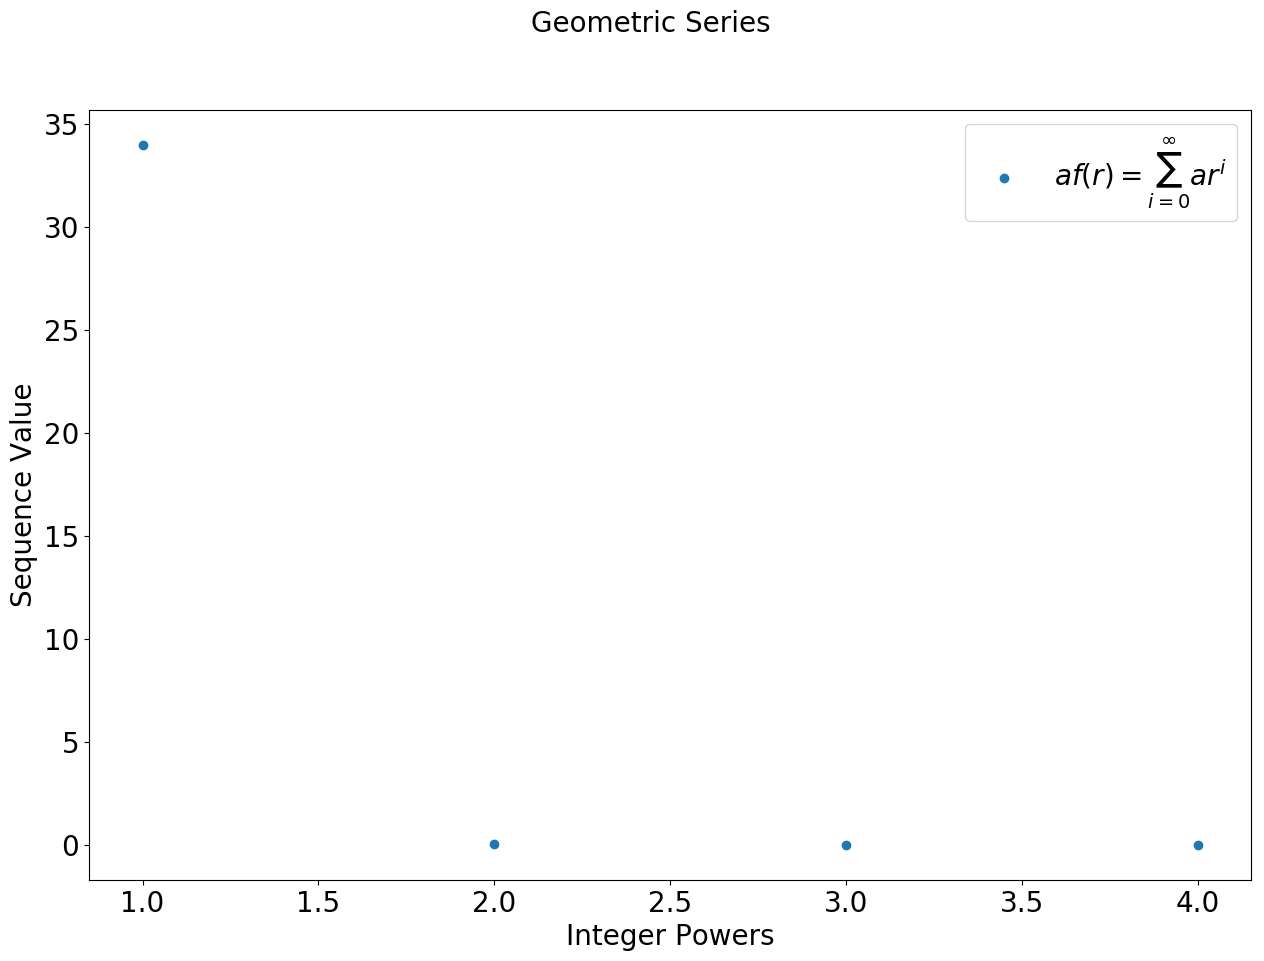

Nice work. Your program require n = 4 before reaching convergence to the sum 34.034034034 for the epsilon you specified.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s - %(levelname)s'
    ' - %(message)s')
logging.getLogger('matplotlib.font_manager').disabled = True

logging.debug('Start of program' + f'\n')

def geo_series():
    """This geometric series follows the definition
    seen in the legend, where a and r are constants and abs(r) < 1.
    Choose your epsilon small enough to ensure accuracy of the sum of the 
    series"""
    
    # Taking in and checking user input for the scalar a.
    flag = True
    while flag:
        a_input = input('Choose a real number, or press return to exit'
            ' program: ')
        
        # If user wishes to exit program
        if not a_input:
            return 'No Problem, Goodbye'
        
        # We check if input is a numerical 
        try:
            a = float(a_input)
            flag = False
        except ValueError:
            logging.debug('Need a numerical input here' + f'\n')
            continue
    
    # Taking in and checking user input for the base r.
    flag = True
    while flag:
        r_input = input('Choose a base with an absolute value less than one,'
            ' or press return to exit program: ')
        
        # If user wishes to exit program
        if not r_input:
            return 'No Problem, Goodbye'
        
        # We check if input is a numerical holding under specified conditions
        try:
            r = float(r_input)
            if abs(r) >= 1:
                logging.debug('We need a base with an absolute value less'
                    ' than 1')
            else:
                flag = False
        except ValueError:
            logging.debug('Really must provide a numerical response' + f'\n')
            continue
    
    # Taking in and checking user input for the epsilon.
    flag = True
    while flag:
        epsilon_input = input('Choose an epsilon greater than 0, or press'
            ' return to exit program: ')
        
        # If user wishes to exit program
        if not epsilon_input:
            return 'No Problem. Goodbye'
        
        # We check if input is a numerical holding under specified conditions
        try:
            epsilon = float(epsilon_input)
            if epsilon <= 0:
                logging.debug('We need an epsilon with value greater'
                    ' than 0')
            else:
                flag = False
        except ValueError:
            logging.debug('Really must provide a numerical response' + f'\n')
            continue
    
    # Taking in and checking user input for the m.
    flag = True
    while flag:
        m_input = input('Choose a positive integer as m, or press'
            ' return to exit program: ')
        
        # If user wishes to exit program
        if not m_input:
            return 'No Problem. Goodbye'
        
        # We check if input is a numerical holding under specified conditions
        try:
            m = int(m_input)
            if m <= 0:
                logging.debug('We need a m with value greater'
                    ' than 0')
            else:
                flag = False
        except ValueError:
            logging.debug('Really must provide a numerical response' + f'\n')
            continue
    
    # We will plot the powers list as our domain, and we will plot the results
    # list as our range
    results = []
    powers = []
    
    # We initiate the power variable at 0
    power = 0
    powers.append(power)
    
    # We initiate the result variable at 0, for the purposes of initiating
    # the absolute value of difference of two adjacent result terms, as
    # seen below in the while loop
    prev_result = 0
    
    # Since we do not wish to plot a value of 0, we omit this entry from
    # our graph
    results.append(np.nan)
    
    # This loop will fill our powers and results lists until the if conditional
    # within evaluates to True
    flag = True
    while flag:
        curr_result = a*r**(power)
        if power!=0 and power-m!=0 and power%m==0:
            if abs(sum(results[power-m:power-1])) < epsilon:
                flag = False
                continue
        results.append(curr_result)
        prev_result = curr_result
        power += 1
        powers.append(power)
        
    # The statements below will plot the powers and results list that we have
    # from the above while loop, completing the graph of our function
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(powers, results, label=r'$af(r)=\sum_{i=0}^{\infty}ar^i$')
    plt.xlabel('Integer Powers', fontsize=20)
    plt.ylabel('Sequence Value', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    fig.suptitle('Geometric Series', fontsize=20)
    plt.legend(prop={'size': 20})
    plt.show()
    
    return f'Nice work. Your program require n = {power} before reaching'\
        f' convergence to the sum {sum(results[1:])} for the epsilon you specified.'

print(geo_series())
